In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
model=Sequential()


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])









In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 32)          16416     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [ ]:
model.fit(X_train,y_cat_train,epochs=12,verbose=2,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 - 61s - loss: 1.6655 - accuracy: 0.3835 - val_loss: 1.3989 - val_accuracy: 0.4944
Epoch 2/12
50000/50000 - 57s - loss: 1.3499 - accuracy: 0.5103 - val_loss: 1.3298 - val_accuracy: 0.5240
Epoch 3/12
50000/50000 - 53s - loss: 1.2423 - accuracy: 0.5533 - val_loss: 1.2881 - val_accuracy: 0.5354
Epoch 4/12
50000/50000 - 52s - loss: 1.1652 - accuracy: 0.5829 - val_loss: 1.1705 - val_accuracy: 0.5799
Epoch 5/12
50000/50000 - 53s - loss: 1.1143 - accuracy: 0.6029 - val_loss: 1.1425 - val_accuracy: 0.5929
Epoch 6/12
50000/50000 - 53s - loss: 1.0752 - accuracy: 0.6189 - val_loss: 1.0856 - val_accuracy: 0.6179
Epoch 7/12
50000/50000 - 53s - loss: 1.0374 - accuracy: 0.6316 - val_loss: 1.0996 - val_accuracy: 0.6178
Epoch 8/12
50000/50000 - 54s - loss: 1.0071 - accuracy: 0.6446 - val_loss: 1.0842 - val_accuracy: 0.6188
Epoch 9/12
50000/50000 - 57s - loss: 0.9817 - accuracy: 0.6534 - val_loss: 1.0541 - val_accuracy: 0.6253
Epoch

In [ ]:
metrics=pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.665505,0.38346,1.398904,0.4944
1,1.349888,0.51028,1.329775,0.5240
2,1.242317,0.55330,1.288069,0.5354
3,1.165231,0.58294,1.170525,0.5799
4,1.114294,0.60288,1.142508,0.5929
5,1.075175,0.61894,1.085645,0.6179
6,1.037384,0.63164,1.099570,0.6178
7,1.007148,0.64458,1.084204,0.6188
8,0.981667,0.65342,1.054106,0.6253
9,0.958883,0.66044,1.071343,0.6272


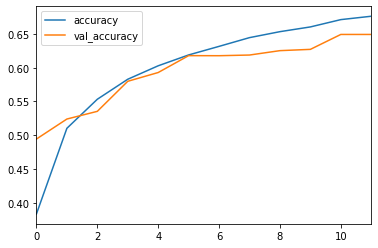

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

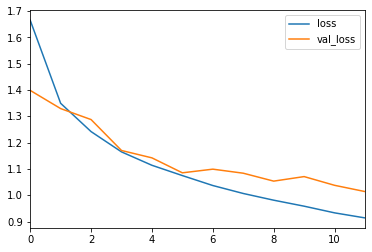

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
predictions=model.predict_classes(X_test)
predictions

array([3, 8, 8, ..., 5, 0, 7], dtype=int64)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1000
           1       0.78      0.78      0.78      1000
           2       0.52      0.55      0.53      1000
           3       0.51      0.43      0.47      1000
           4       0.50      0.70      0.58      1000
           5       0.64      0.43      0.52      1000
           6       0.74      0.71      0.73      1000
           7       0.71      0.65      0.68      1000
           8       0.78      0.75      0.76      1000
           9       0.70      0.78      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



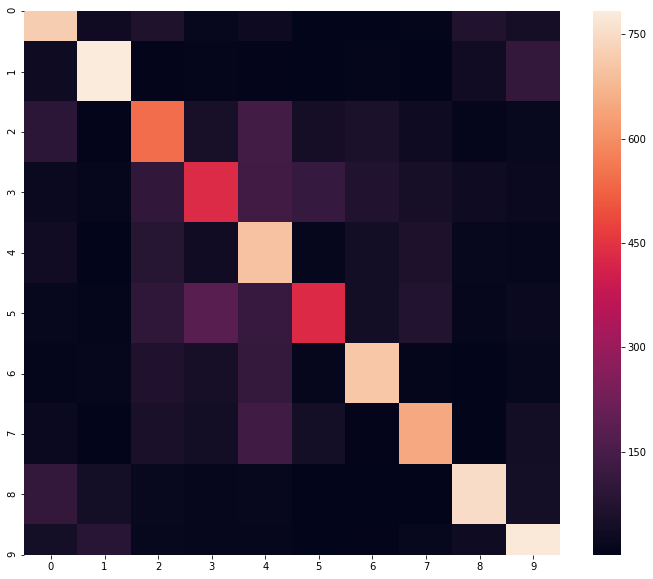

In [ ]:

plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test,predictions))

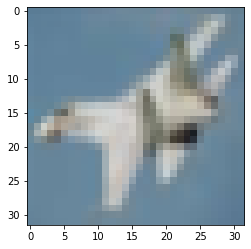

In [ ]:
plt.imshow(X_test[10])

In [ ]:
X=X_test[10]

In [ ]:
X.shape

(32, 32, 3)

In [ ]:
X=X.reshape(1,32,32,3)
y_test[10]

array([0], dtype=uint8)

In [ ]:
model.predict_classes(X)

array([0], dtype=int64)